## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn import metrics                                  
from sklearn.metrics import classification_report          
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_auc_score

from sklearn.pipeline import make_pipeline

from sklearn.multiclass import OneVsRestClassifier  
from sklearn.model_selection import GridSearchCV 

import warnings
warnings.filterwarnings("ignore")

# Bag of Words

This example shows how to convert text into a Bag of Words using CountVectorizer.
Unigrams and bigrams are created, rare and very common words are filtered using min_df and max_df, and the number of features is limited.

### Count Vectorizer

In [2]:
txt = ["He is ::having a great Time, at the park time?",
    "She, unlike most women, is a big player on the park's grass.",
    "she can't be going"]

# Initialize CountVectorizer
# - stop_words='english' removes common English words (is, the, at, etc.)
# - analyzer='word' means tokenization is done at word level
# - ngram_range=(1,1) means only unigrams (single words)
# - min_df=1 keeps words appearing at least once
# - max_df=1.0 keeps words appearing in up to 100% of documents
# - max_features=None means keep all features

cv = CountVectorizer(
    stop_words = 'english',
    max_features = None, 
    ngram_range = (1,1),
    min_df = 1,            
    max_df = 1, 
    analyzer = 'word'
)

cv.fit(txt)
bag_of_words = cv.transform(txt)

cv.get_feature_names_out()

array(['big', 'going', 'grass', 'great', 'having', 'player', 'time',
       'unlike', 'women'], dtype=object)

In [3]:
cv.vocabulary_

{'having': 4,
 'great': 3,
 'time': 6,
 'unlike': 7,
 'women': 8,
 'big': 0,
 'player': 5,
 'grass': 2,
 'going': 1}

In [4]:
bag_of_words

<3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [5]:
bow = bag_of_words.toarray()
bow

array([[0, 0, 0, 1, 1, 0, 2, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

Here, we can see our sentences are converted into one hot encoded vectors.

### N-grams (N = 2)

In [6]:
cv2 = CountVectorizer(
    stop_words = 'english',
    max_features = None, 
    ngram_range = (1,2),
    min_df = 1,
    max_df = 1, 
    analyzer = 'word'
)

cv2.fit(txt)
bag_of_words_2 = cv2.transform(txt)

cv2.get_feature_names_out()

array(['big', 'big player', 'going', 'grass', 'great', 'great time',
       'having', 'having great', 'park grass', 'park time', 'player',
       'player park', 'time', 'time park', 'unlike', 'unlike women',
       'women', 'women big'], dtype=object)

In [7]:
cv2.vocabulary_

{'having': 6,
 'great': 4,
 'time': 12,
 'having great': 7,
 'great time': 5,
 'time park': 13,
 'park time': 9,
 'unlike': 14,
 'women': 16,
 'big': 0,
 'player': 10,
 'grass': 3,
 'unlike women': 15,
 'women big': 17,
 'big player': 1,
 'player park': 11,
 'park grass': 8,
 'going': 2}

In [8]:
bow = bag_of_words_2.toarray()
bow

array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

### Min_df, Max_df, Max_features

In [9]:
cv3 = CountVectorizer(
    stop_words = 'english',
    max_features = 5, 
    ngram_range = (1,1),
    min_df = 0.3, 
    max_df = 0.9, 
    analyzer = 'word'
)

cv3.fit(txt)
bag_of_words_3 = cv3.transform(txt)

cv3.get_feature_names_out()

array(['big', 'going', 'grass', 'park', 'time'], dtype=object)

In [10]:
cv3.vocabulary_

{'time': 4, 'park': 3, 'big': 0, 'grass': 2, 'going': 1}

# TF-IDF Vectorizer

TF-IDF converts text into numerical features by giving higher weight to important words and lower weight to very common words.
It helps models focus on words that better describe a document.

In [11]:
txt1 = [
    'His smile was not perfect',
    'His smile was not not not not perfect',
    'she not sang'
]

# No smoothing, no sublinear scaling, and no normalization

tf = TfidfVectorizer(smooth_idf = False,
    sublinear_tf = False,
    norm = None,
    analyzer = 'word'
)

tf.fit(txt1)

tfidf = tf.transform(txt1)

tf.vocabulary_

{'his': 0, 'smile': 5, 'was': 6, 'not': 1, 'perfect': 2, 'she': 4, 'sang': 3}

In [12]:
n = tf.get_feature_names_out()

for i in n:
    index = tf.vocabulary_.get(i)
    idf_score = tf.idf_[index]
    print(f"{i} : {round(idf_score,4)}")

#or
#idf = tf.idf_
#print(dict(zip(tf.get_feature_names_out(), idf)))

his : 1.4055
not : 1.0
perfect : 1.4055
sang : 2.0986
she : 2.0986
smile : 1.4055
was : 1.4055


Text(0.5, 1.0, 'Inverse Document Frequency (IDF) per token')

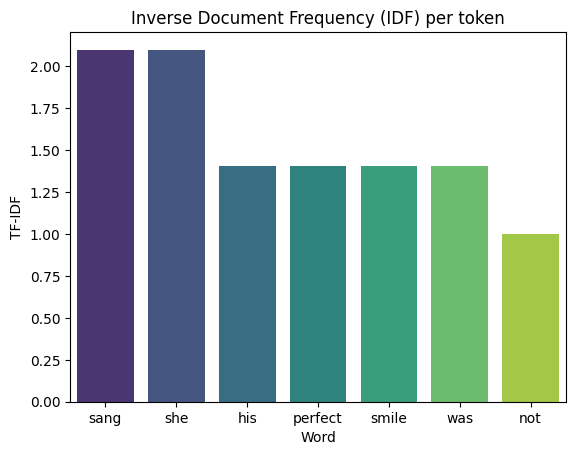

In [13]:
a = dict(zip(tf.get_feature_names_out(), tf.idf_))

df = pd.DataFrame.from_dict(a, orient = 'index').reset_index()
df.columns = ('Word', 'TF-IDF')

df.sort_values(by = 'TF-IDF', ascending = False, inplace = True)

sns.barplot(x = 'Word', y = 'TF-IDF', data = df, palette = 'viridis')
plt.title("Inverse Document Frequency (IDF) per token")

In [14]:
tf.transform(txt1)

<3x7 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [15]:
tf.transform(txt1).toarray()

array([[1.40546511, 1.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [1.40546511, 4.        , 1.40546511, 0.        , 0.        ,
        1.40546511, 1.40546511],
       [0.        , 1.        , 0.        , 2.09861229, 2.09861229,
        0.        , 0.        ]])

In [16]:
print("Features with Higher TF-IDF:" , df['Word'][:3].tolist(), sep = '\n')
print('\n')
print("Features with Lower TF-IDF:" , df['Word'][4:].tolist(), sep = '\n')

Features with Higher TF-IDF:
['sang', 'she', 'his']


Features with Lower TF-IDF:
['smile', 'was', 'not']


# Load, Clean, Train, Vectorize, Classify Toxic Comments (w/o parameter tuning)

In [17]:
train = pd.read_csv(r'C:/Users/aabha/Downloads/data/train.csv')
test = pd.read_csv(r'C:/Users/aabha/Downloads/data/test.csv')

In [18]:
train.head(4)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0


In [19]:
test.head(4)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."


In [20]:
train.shape

(159571, 8)

In [21]:
train['toxic'].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [22]:
train['identity_hate'].value_counts()

identity_hate
0    158166
1      1405
Name: count, dtype: int64

In [23]:
train['severe_toxic'].value_counts()

severe_toxic
0    157976
1      1595
Name: count, dtype: int64

## Clean text data

In [48]:
# removing new space lines
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub(r'\\n', ' ', str(x)))
# removing username
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub("\[\[User.*", ' ', str(x)))
# removing IP address
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub("\d{1-3}\.\d{1-3}\.\d{1-3}\.\d{1-3}", ' ', str(x)))
# removing httpp links
train['comment_text'] = train['comment_text'].apply(lambda x: re.sub("(http://.*?\s)|(http://.*)", ' ', str(x)))

In [49]:
# do same for test data

test['comment_text'] = test['comment_text'].apply(lambda x: re.sub(r'\\n', ' ', str(x)))
test['comment_text'] = test['comment_text'].apply(lambda x: re.sub("\[\[User.*", ' ', str(x)))
test['comment_text'] = test['comment_text'].apply(lambda x: re.sub("\d{1-3}\.\d{1-3}\.\d{1-3}\.\d{1-3}", ' ', str(x)))
test['comment_text'] = test['comment_text'].apply(lambda x: re.sub("(http://.*?\s)|(http://.*)", ' ', str(x)))

In [50]:
x = train['comment_text']
y = train.iloc[:, 2:8]

In [51]:
y.columns

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

# Train-Test Split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2)

In [53]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (127656,)
Shape of x_test: (31915,)
Shape of y_train: (127656, 6)
Shape of y_test: (31915, 6)


### Vectorize

In [54]:
tfidf_vec = TfidfVectorizer(
    stop_words = 'english',
    max_df = 1,
    min_df = 1,
    ngram_range=(1,1),
    smooth_idf = False,
    sublinear_tf = True,
    max_features = 30000
    
)

tfidf_vec.fit(x_train)
x_train_vec = tfidf_vec.transform(x_train)

In [55]:
# transform test data as well

x_test_vec = tfidf_vec.transform(x_test)

test_vec = tfidf_vec.transform(test['comment_text'])

# Logistic Regression

This is multi-label classification:

A single comment can be:

toxic ✅

obscene ✅

insult ✅
at the same time

So we cannot use a single multinomial classifier.

Hence, train one binary classifier per label

In [56]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
loss = []
accuracy = []
auc = []

for i in classes:
    train_label = y_train[i]
    test_label = y_test[i]

    lr = LogisticRegression(solver = 'sag', C = 10)

    ## Cross-validated log loss
    cv_loss = np.mean(cross_val_score(lr, x_train_vec, train_label, cv = 5, scoring = 'neg_log_loss'))
    loss.append(cv_loss)
    print(f'CV Log_loss score for class {i} is {cv_loss}')

    ## Cross-validated Accuracy
    cv_acc = np.mean(cross_val_score(lr, x_train_vec, train_label, cv = 5, scoring = 'accuracy'))
    accuracy.append(cv_acc)
    print(f'CV Accuracy score for class {i} is {cv_acc}')

    lr.fit(x_train_vec, train_label)

    y_pred = lr.predict(x_test_vec)
    y_pred_prob = lr.predict_proba(x_test_vec)[:, 1]  # want probabilities

    auc_score = metrics.roc_auc_score(test_label, y_pred_prob)
    auc.append(auc_score)
    print(f"CV ROC_AUC score {auc_score}\n")
    
    # Evaluation reports
    print(confusion_matrix(test_label, y_pred))
    print(classification_report(test_label, y_pred))

CV Log_loss score for class toxic is -0.31529105948449526
CV Accuracy score for class toxic is 0.9044071568329846
CV ROC_AUC score 0.530831180125696

[[28747    77]
 [ 3025    66]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28824
           1       0.46      0.02      0.04      3091

    accuracy                           0.90     31915
   macro avg       0.68      0.51      0.49     31915
weighted avg       0.86      0.90      0.86     31915

CV Log_loss score for class severe_toxic is -0.05504874107453037
CV Accuracy score for class severe_toxic is 0.9902080591565865
CV ROC_AUC score 0.5202500539404039

[[31565     5]
 [  342     3]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31570
           1       0.38      0.01      0.02       345

    accuracy                           0.99     31915
   macro avg       0.68      0.50      0.51     31915
weighted avg       0.98 

# Parameter Tuning

In [57]:
pipe = make_pipeline(TfidfVectorizer(
    stop_words = 'english',
    max_df = 1,
    min_df = 1,
    ngram_range=(1,1),
    smooth_idf = False,
    sublinear_tf = True),
    OneVsRestClassifier(LogisticRegression())   
)

# Parameters to tune
param_grid = {
    'tfidfvectorizer__max_features': [10000, 30000],
    'onevsrestclassifier__estimator__solver': ['liblinear', 'sag'],
}

# Grid search with ROC-AUC scoring
grid = GridSearchCV(pipe, param_grid, cv = 3, scoring = 'roc_auc')

# Fit grid search
grid1 = grid.fit(x_train, y_train)

In [58]:
print(grid1.best_estimator_.named_steps['onevsrestclassifier'])
print(grid1.best_estimator_.named_steps['tfidfvectorizer'])

OneVsRestClassifier(estimator=LogisticRegression(solver='sag'))
TfidfVectorizer(max_df=1, max_features=30000, smooth_idf=False,
                stop_words='english', sublinear_tf=True)


In [59]:
grid1.best_params_

{'onevsrestclassifier__estimator__solver': 'sag',
 'tfidfvectorizer__max_features': 30000}

In [60]:
y_pred_new = grid1.predict(x_test)

In [61]:
print("Toxic Confusion Matrixs: \n{}".format(confusion_matrix(y_test['toxic'], y_pred_new[:,0])))
print("\nSevere Toxic: \n{}".format(confusion_matrix(y_test['severe_toxic'], y_pred_new[:,1])))
print("\nObscene: \n{}".format(confusion_matrix(y_test['obscene'], y_pred_new[:,2])))
print("\nThreat: \n{}".format(confusion_matrix(y_test['threat'], y_pred_new[:,3])))
print("\nInsult: \n{}".format(confusion_matrix(y_test['insult'], y_pred_new[:,4])))
print("\nIdentity Hate: \n{}".format(confusion_matrix(y_test['identity_hate'], y_pred_new[:,5])))

print("\nToxic Classification report: \n{}".format(classification_report(y_test['toxic'], y_pred_new[:,0])))
print("\nSevere Toxic: \n{}".format(classification_report(y_test['severe_toxic'], y_pred_new[:,1])))
print("\nObscene: \n{}".format(classification_report(y_test['obscene'], y_pred_new[:,2])))
print("\nThreat: \n{}".format(classification_report(y_test['threat'], y_pred_new[:,3])))
print("\nInsult: \n{}".format(classification_report(y_test['insult'], y_pred_new[:,4])))
print("\nIdentity Hate: \n{}".format(classification_report(y_test['identity_hate'], y_pred_new[:,5])))

Toxic Confusion Matrixs: 
[[28824     0]
 [ 3091     0]]

Severe Toxic: 
[[31570     0]
 [  345     0]]

Obscene: 
[[30234     0]
 [ 1681     0]]

Threat: 
[[31825     0]
 [   90     0]]

Insult: 
[[30366     0]
 [ 1549     0]]

Identity Hate: 
[[31648     0]
 [  267     0]]

Toxic Classification report: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28824
           1       0.00      0.00      0.00      3091

    accuracy                           0.90     31915
   macro avg       0.45      0.50      0.47     31915
weighted avg       0.82      0.90      0.86     31915


Severe Toxic: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31570
           1       0.00      0.00      0.00       345

    accuracy                           0.99     31915
   macro avg       0.49      0.50      0.50     31915
weighted avg       0.98      0.99      0.98     31915


Obscene: 
            

In [62]:
vectorizer = grid1.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
x_test_set = vectorizer.transform(x_test)

# find maximum value for each of the features over dataset:
max_value = x_test_set.max(axis = 0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("\nFeatures with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['0000000' 'pleasecontact' 'pleaseadd' 'please_help_with_vandalism'
 'please81' 'please190' 'pleaing' 'pleads' 'pleace' 'pldd' 'plazoid'
 'plazo' 'plaze' 'plazas' 'playwriting' 'playthings' 'playstaiton'
 'playright' 'playradioplay' 'playmates']

Features with highest tfidf: 
['pranksters' 'tcha' 'dikkkkk' 'myskin' 'olives' 'pyl' 'pranic' 'ballons'
 'olliver' 'prancing' 'myrna' 'myrrha' 'manger' 'palda' 'kdka' 'palaver'
 'palatalization' 'mangas' 'dihydrous' 'misappropriations']


# Adding feature

In [63]:
train['len_character'] = train['comment_text'].apply(lambda x: len(re.findall(r"[\w]", str(x))))

In [64]:
train.head(4)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len_character
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,212
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,83
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,186
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,488


In [65]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion  #unites all arrays into one array
from sklearn.pipeline import Pipeline

In [66]:
x = train[['comment_text', 'len_character']] #these will be our features
y = train.iloc[:, 2:8]  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

##### FunctionTransformer lets you apply a custom function inside a sklearn pipeline

In [67]:
get_numeric_data = FunctionTransformer(lambda a: a[['len_character']], validate = False)
get_text_data = FunctionTransformer(lambda a: a['comment_text'], validate = False)

print(get_text_data.fit_transform(x_train).shape)
print(get_numeric_data.fit_transform(x_train).shape)

(127656,)
(127656, 1)


In [68]:
pl = Pipeline([
        ('union', FeatureUnion(                      # unites both text and numeric arrays into one array
            transformer_list = [('numeric_features', Pipeline([('selector', get_numeric_data)])),
                ('text_features', Pipeline([('selector', get_text_data),('vectorizer', TfidfVectorizer(stop_words = 'english',
                                                    strip_accents = 'unicode',
                                                    analyzer = 'word',
                                                    ngram_range = (1, 1),
                                                    min_df = 5))
                ]))
             ]
        )), # right here is where we would put interaction terms preprocessing such as PolynomialFeatures
            # right here is where we would put a scaler if we needed one
        ('clf', OneVsRestClassifier(LogisticRegression())) 
    ])

In [70]:
param_grid = {'union__text_features__vectorizer__max_features': [10000, 30000],
              'clf__estimator__C': [0.1, 1]
             } 
grid = GridSearchCV(pl, param_grid, cv=3, scoring='roc_auc')

grid2 = grid.fit(x_train, y_train)

In [71]:
print(grid2.best_score_)
print(grid2.best_params_)
print(grid2.estimator)

0.9742271820393533
{'clf__estimator__C': 1, 'union__text_features__vectorizer__max_features': 30000}
Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x00000192DA163CA0>))])),
                                                ('text_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x00000192DA3BDE50>)),
                                                                 ('vectorizer',
                                                                  TfidfVectorizer(min_df=5,
                                                                                  stop_words='english',
                               

In [72]:
pred_y_test = grid2.predict(x_test)

print("Toxic Confusion Matrixs: \n{}".format(confusion_matrix(y_test['toxic'], pred_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(confusion_matrix(y_test['severe_toxic'], pred_y_test[:,1])))
print("\nObscene: \n{}".format(confusion_matrix(y_test['obscene'], pred_y_test[:,2])))
print("\nThreat: \n{}".format(confusion_matrix(y_test['threat'], pred_y_test[:,3])))
print("\nInsult: \n{}".format(confusion_matrix(y_test['insult'], pred_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(confusion_matrix(y_test['identity_hate'], pred_y_test[:,5])))

print("\nToxic Classification report: \n{}".format(classification_report(y_test['toxic'], pred_y_test[:,0])))
print("\nSevere Toxic: \n{}".format(classification_report(y_test['severe_toxic'], pred_y_test[:,1])))
print("\nObscene: \n{}".format(classification_report(y_test['obscene'], pred_y_test[:,2])))
print("\nThreat: \n{}".format(classification_report(y_test['threat'], pred_y_test[:,3])))
print("\nInsult: \n{}".format(classification_report(y_test['insult'], pred_y_test[:,4])))
print("\nIdentity Hate: \n{}".format(classification_report(y_test['identity_hate'], pred_y_test[:,5])))

Toxic Confusion Matrixs: 
[[28654   170]
 [ 1234  1857]]

Severe Toxic: 
[[31505    65]
 [  257    88]]

Obscene: 
[[30147    87]
 [  642  1039]]

Threat: 
[[31820     5]
 [   76    14]]

Insult: 
[[30215   151]
 [  813   736]]

Identity Hate: 
[[31627    21]
 [  229    38]]

Toxic Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28824
           1       0.92      0.60      0.73      3091

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.95      0.96      0.95     31915


Severe Toxic: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31570
           1       0.58      0.26      0.35       345

    accuracy                           0.99     31915
   macro avg       0.78      0.63      0.67     31915
weighted avg       0.99      0.99      0.99     31915


Obscene: 
            